In [1]:
import arviz as az
import matplotlib.pylab as plt
import numpyro.distributions as dist

from makeCorner import *

az.rcParams["plot.max_subplots"] = 80

In [2]:
cdf_file = "/home/max.lalleman/CBC_Stoch_Search/gwbcbcmodeling/gwbcbcmodeling/New_Code_New_sample/Varying_Power_Law_Sigmoid/cdf_files/CBC_z_0_to_4_analysis_high_low_for_mMax.cdf"
# "./RUNS/CBC_O3_Power_Law.cdf"
data = az.from_netcdf(cdf_file)

In [3]:
new_priors = {
    "logR20":dist.Uniform(-2,1),
    "alpha_ref":dist.Normal(-2,3),
    "delta_alpha":dist.Normal(0,1),
    "width_alpha":dist.Uniform(-1,1),
    "middle_z_alpha":dist.Uniform(0,4),
    "mu_m1":dist.Uniform(20,50),
    "mMin":dist.Uniform(5,15),
    "bq":dist.Normal(0,3),
    "alpha_z":dist.Normal(0,4),
    "beta_z":dist.Uniform(0,10),
    "zp": dist.Uniform(0,4),
    "fpeak": dist.Uniform(-5,0),
    "high_f_peak": dist.Uniform(-5,0),
    "width_f_peak": dist.Uniform(-1,1),
    "middle_z_f_peak": dist.Uniform(0,4),
    "sig_m1": dist.Uniform(1.5,15),
    "mMax":dist.Uniform(50,100),
    "high_mMax":dist.Uniform(50, 100),
    "width_mMax":dist.Uniform(-1,1),
    "middle_z_mMax":dist.Uniform(0,4),
    "dmMax":dist.Uniform(0.5,1.5),
    "high_dm":dist.Uniform(0.5,1.5),
    "width_dm":dist.Uniform(-1,1),
    "middle_z_dm":dist.Uniform(0,4),    
}

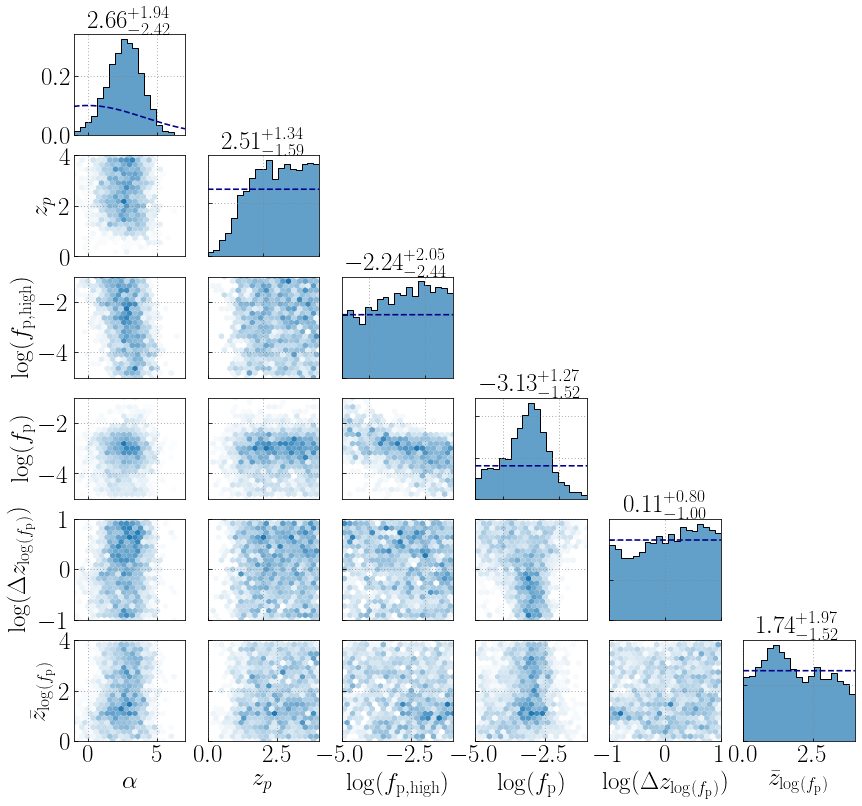

In [10]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_f_peak = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-5,-1),"label":r"$\log(f_{\rm p, high})$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$\log(f_{\rm p})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\log(f_{\rm p})})$"},
    "middle_z_f_peak":{"data":stacked_samples_no_GWB.middle_z_f_peak,"plot_bounds":(0,4),"label":r"$\bar z_{\log(f_{\rm p})}$"},
}

plot_corner(fig, toPlot_no_GWB_f_peak,"#1f78b4",labelsize=25, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
# plt.savefig("PE_f_peak_power_law.pdf", dpi = 400, bbox_inches = "tight")
plt.show()

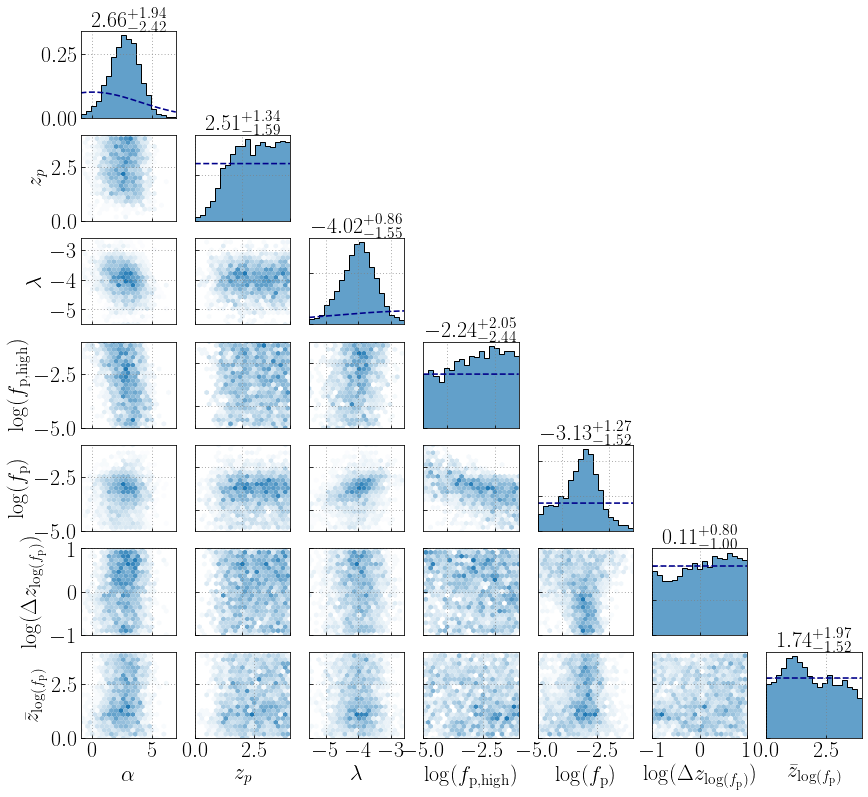

In [9]:
fig = plt.figure(figsize=(14,13))
stacked_samples_no_GWB = data.posterior.stack(draws=("chain", "draw"))
toPlot_no_GWB_f_peak = {
    "alpha_z":{"data":stacked_samples_no_GWB.alpha_z,"plot_bounds":(-1,7),"label":r"$\alpha$"},
    "zp":{"data":stacked_samples_no_GWB.zp,"plot_bounds":(0,4),"label":r"$z_p$"},
    "alpha_ref":{"data":stacked_samples_no_GWB.alpha_ref,"plot_bounds":(-5.5,-2.6),"label":r"$\lambda$"},
    "high_f_peak":{"data":stacked_samples_no_GWB.log_high_f_peak,"plot_bounds":(-5,-1),"label":r"$\log(f_{\rm p, high})$"},
    "fpeak":{"data":stacked_samples_no_GWB.log_f_peak,"plot_bounds":(-5,-1),"label":r"$\log(f_{\rm p})$"},
    "width_f_peak":{"data":stacked_samples_no_GWB.log_width_f_peak,"plot_bounds":(-1,1),"label":r"$\log(\Delta z_{\log(f_{\rm p})})$"},
    "middle_z_f_peak":{"data":stacked_samples_no_GWB.middle_z_f_peak,"plot_bounds":(0,4),"label":r"$\bar z_{\log(f_{\rm p})}$"},
}

fig = plot_corner(fig, toPlot_no_GWB_f_peak,"#1f78b4",labelsize=22, priors = new_priors)
# plt.xticks(fontsize=10)
# plt.yticks(fontsize=10)
# plt.tight_layout()
plt.savefig("PE_f_peak_power_law_with_lambda.pdf", dpi = 400, bbox_inches = "tight")
plt.show()